# CMSE 802 Project 
# The Behavioral Analysis of Predictive Modeling on a Bank Marketing Dataset.

$$\textbf{Jamell Dacon}^1$$
$$$$
$$ ^1 \ \textit{Michigan State University, East Lasing, MI.} $$
$$$$


## Abstract

        I propose a data mining supervised learning approach to predict the accuracy of several models of the client subscription of a term deposit to a bank via information collected via a telephone call; with data collected from UCI Machine Learning Repository. The largest dataframe was analyzed with 20 predictor variables and a target variable comprising of 41188 examples. The individual comparison of 4 models i.e. Gradient Boosting (GB), Random Forest (RF), Multi-Layer Perceptron (MLP) and Logistic Regression (LGR) models were made along with an 8 model cross-validation comparison comprising of Linear Discriminant Analysis (LDA), K-Nearest Neighbors (KNN), Decision Trees (DT), Support Vector Machine (SVM), Naive Bayes (NB) including the individual model comparison models. Using three metrics such as classification report, accuracy score and a confusion matrix. Both the GB and MLP classifer models produced the best results with an accuracy score of 91.90% and 90.97% respectively, tested on 40% of the data. In the 8 model comparison 10-fold cross validation was implemented were only two models, namely the Gradient Boosting (GB) and Linear Discriminant Analysis (LDA) models produced the best mean accuracy results accomplishing over 90%, whereas the mean of the RF model's accuracy decreased by 1.43%.
    
    Key words: Supervised, Accuracy score, Cross-validation
    
    

## 1.  Introduction
    
          Banks are a cruicial part of our economy and may be considered the safest way of saving money over a long-period of time. The commercializing of banks is ubiquitious, meaning it can be found everywhere. One of the many ways to attract customers is by initializing a relationship with a customer with the goal of that customer becoming a client of the bank. This relationship is created by a 1-1 telephone call between the telemarketer and the potential client. With the information received from each potential customer, a data mining approach will be undertaken to gain insight from the information retrieved i.e the available examples to have knowledge of the prediction of a subscription of a client to the bank using classification and regression models. There are several supervised models used such as Gradient Boosting (GB), Random Forest (RF), Multi-Layer Perceptron (MLP), Logistic Regression (LGR) Linear Discriminant Analysis (LDA), K-Nearest Neighbors (KNN), Decision Trees (DT), Support Vector Machine (SVM) and Naive Bayes (NB).
        
          In this paper, I propose analytical predictive modeling insight of the behavior of several algorithm on predicting the accuracy result of a phone call to a client from a bank telemarketer attemptiong to sell long term deposits by using supervised learning. The main contributions of this work are:
        • A focus on Data Exploration i.e Univariate Analysis was conducted on the largest dataset consisting of 41188 examples with 20 attributes. In the modeling phase, the feature distribution was plotted to gain insight of the visualization of each feature. Futhermore, as over 50% of the data was categorical, encoding allowed the data to be fully numerical which was then passed into models.
        • Several individual model comparisons on a 60/40 split. 
        • A comparison of eight supervised models (GB, RF, LDA, KNN, LGR, SVM, DT and NB). 


## 2.  Methods and Materials

### 2.1. Bank telemarketing dataset information 

There are four datasets: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

- **bank-additional-full.csv** with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010)

- **bank-additional.csv** with 10% of the examples (4119), randomly selected from **bank-additional-full.csv**, and 20 inputs.

- **bank-full.csv** with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 

- **bank.csv** with 10% of the examples and 17 inputs, randomly selected from **bank-full.csv** (older version of this dataset with less inputs). 

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). However, I proposed to carry about this project using the **bank-additional-full.csv** (largest dataset) since the goal of this project is the efficiently and accurately predict the output using each supervised method to attain knowledge of the robustness of each algorithm.

### 2.2. Data mining tools

In [1]:
# Load in models and packages necessary for datasets
# Importing individual libraries make it easy for us to use them without having to call the parent libraries
import math
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Visualization libraries
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

# Managing Warnings i.e. Deprecation warnings
import warnings
warnings.filterwarnings('ignore')

### 2.3. Bank telemarketing data: Attribute Information  

**Input variables:**

**i. Bank client data:**
1.  $\underline{age}$ (numeric)
2.  $\underline{job}$: type of job (categorical): 'admin.','bluecollar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician','unemployed','unknown')
3.  $\underline{marital}$: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4.  $\underline{education}$ (catgorical): 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5.  $\underline{default}$: has credit in default? (categorical: 'no','yes','unknown')
6.  $\underline{housing}$: has housing loan? (categorical: 'no','yes','unknown')
7.  $\underline{loan}$: has personal loan? (categorical: 'no','yes','unknown')

**ii. Related with the last contact of the current campaign:**
8.  $\underline{contact}$: contact communication type (categorical: 'cellular','telephone') 
9.  $\underline{month}$: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10.  $\underline{day \ of \ week}$: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11.  $\underline{duration}$: last contact duration, in seconds (numeric). 

Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**iii. Other attributes:**
12.  $\underline{campaign}$: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13.  $\underline{pdays}$: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14.  $\underline{previous}$: number of contacts performed before this campaign and for this client (numeric)
15.  $\underline{poutcome}$: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**iv. Social and economic context attributes**
16.  $\underline{emp.var.rate}$: employment variation rate - quarterly indicator (numeric)
17.  $\underline{cons.price.idx}$: consumer price index - monthly indicator (numeric) 
18.  $\underline{cons.conf.idx}$: consumer confidence index - monthly indicator (numeric) 
19.  $\underline{euribor3m}$: euribor 3 month rate - daily indicator (numeric)
20.  $\underline{nr.employed}$: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**
21.  $\underline{y}$ - has the client subscribed a term deposit? (binary: 'yes','no')

### 2.5. Data Exploration - Univariate Analysis
When exploring our dataset and its features, we have many options available to us. Here we will explore each feature individually, or compare pairs of features, finding the correlation between multiple features is called Multivariate analysis.

Here we explore some simple Univariate (a single feature) analysis.
Features can be of multiple types:
- **Nominal**: is for mutual exclusive, but not ordered, categories.
- **Ordinal**: is one where the order matters but not the difference between values.
- **Interval**: is a measurement where the difference between two values is meaningful.
- **Ratio**: has all the properties of an interval variable, and also has a clear definition of 0.0.

There are multiple ways of manipulating each feature type, but for simplicity, we'll define only two feature types i.e. attributes of features:
- **Numerical**: any feature that contains numeric values.
  - Nominal 
  - Ordinal 
- **Categorical**: any feature that contains categories, or text.
  - Interval
  - Ratio

### 2.5.1 Univariate Analysis of the Bank Additional Full dataset

In [2]:
# Load in the bank-additional-full.csv dataset 
bank_additional_full_df = pd.read_csv('bank-additional-full.csv',sep=';')

# We can view the first 5 rows of the dataframe (df) 
bank_additional_full_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# We first check the df for missing values i.e. null entries
bank_additional_full_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [4]:
# We can now get the information of each row in the df i.e data types and null entries of each column
bank_additional_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

Now, we have an idea of the attributes types of each column, hence we can then do some analysis on the numerical and categorical columns of the df, along with some visualization those columns.


In [5]:
# We can now get the description of each numerical column in the df
bank_additional_full_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
# We can get the description of each categorical column in the df
bank_additional_full_df.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


### 2.5.2 Feature distribution i.e. visualization of each feature

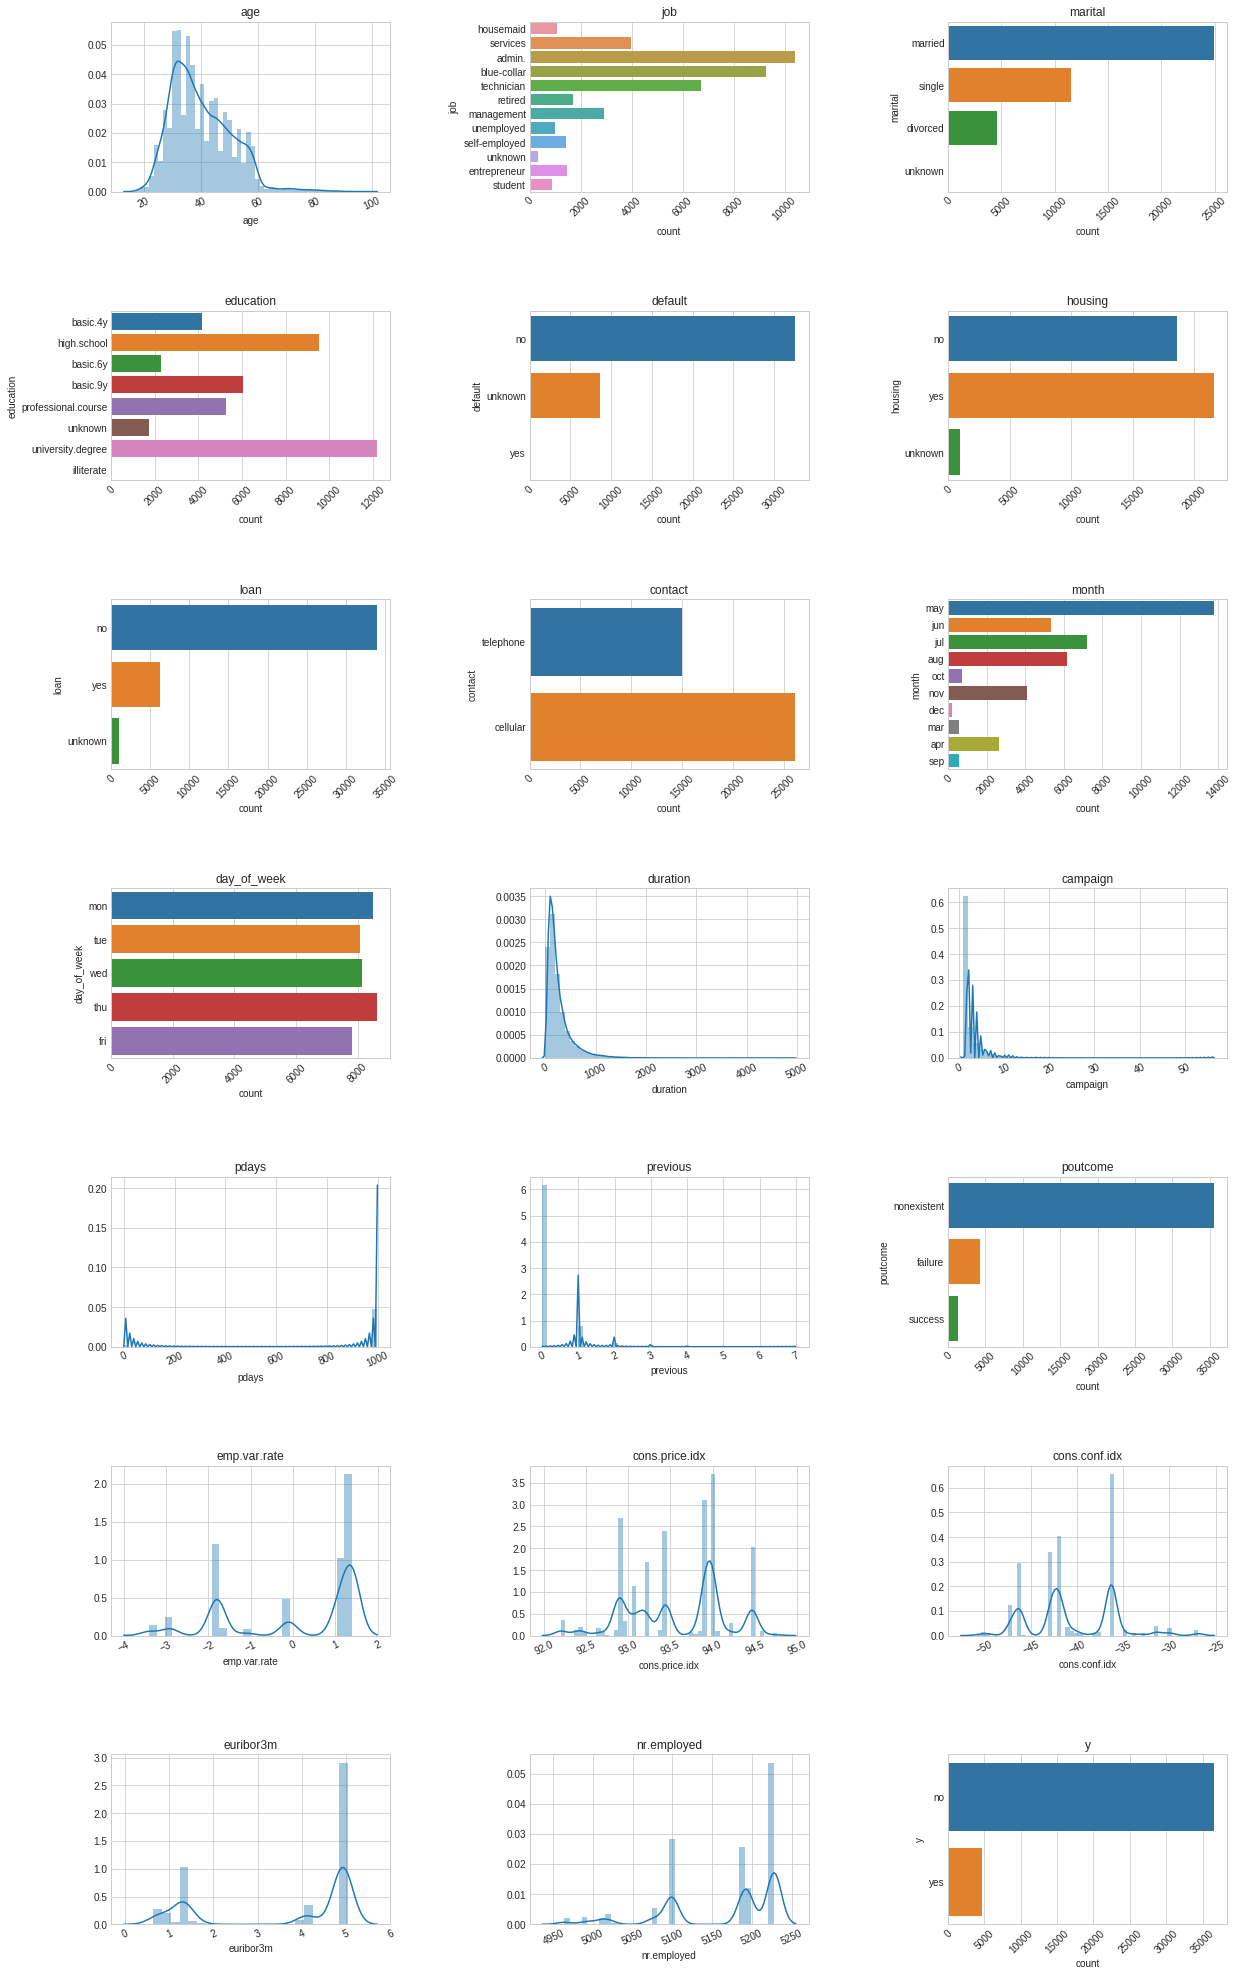

In [7]:
# Let’s plot the distribution of each feature

def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:21] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=45)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(bank_additional_full_df, cols=3, width=20, height=35, hspace=0.7, wspace=0.5)

### 2.5.3 Model Preparation: Encoding 

In [8]:
# We can create a dummy column for our target variable y called yHat to have a count of the target variable.

yHat ={'yes' : 1, 'no' : 0}
bank_additional_full_df['yHat'] = bank_additional_full_df['y'].map(lambda x: yHat[x])
bank_additional_full_df['yHat'].value_counts()

0    36548
1     4640
Name: yHat, dtype: int64

In [9]:
# Now, we can view the first 5 rows of the df. However we now see that yHat is an encoded column of y
bank_additional_full_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,yHat
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [10]:
# We can further do some analysis by encoding the categorical data to be numerical  

for col in bank_additional_full_df.columns:
    if bank_additional_full_df[col].dtype == object:
        bank_additional_full_df[col] = bank_additional_full_df[col].astype('category')
        bank_additional_full_df[col] = bank_additional_full_df[col].cat.codes

Let's check to see that it worked (with the exception of the yHat dummy variable as it should be the same as y encoded):

In [11]:
# Now, we can view the first 5 encoded rows of the df.

bank_additional_full_df = bank_additional_full_df.drop(['yHat'], axis=1)
bank_additional_full_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


### 2.5.4 Explanatory Knowledge: Feature Correlation and Covariance 

Here we compare pairs of features, by finding the correlation between multiple features, depicted with a heat map for each for the Bank Additional Full dataset.

**Question: Why do we want correlation instead of the covariance?**

**Answer**: Covariance and Correlation are two significantly used terms in the field of statistics and probability theory, where we can understand the difference between correlation and covariance matrices, and understand the application of the two in the field of analytics and datasets.

As we see from the formula of covariance (biased), 

$$ Cov(X,Y) = \frac{1}{n}\sum({X}-{\bar{X}})({Y}-{\bar{Y}}) $$ 

it assumes the units from the product of the units of the two variables. This is because it divides the value of covariance by the product of standard deviations which have the same units. The value of covariance is affected by the change in scale of the variables. If all the values of the given variable are multiplied by a constant and all the values of another variable are multiplied, by a similar or different constant, then the value of covariance also changes.

On the other hand, correlation is dimensionless i.e. **a unit-free measure of the relationship between variables** (which is what we need). However, the value of correlation is not influenced by the change in scale of the values. 


Lastly, another difference between covariance and correlation is the range of values that they can assume. While correlation coefficients lie between -1 and +1, covariance can take any value between $-\infty$ and $+\infty$

### 2.6 Feature Selection

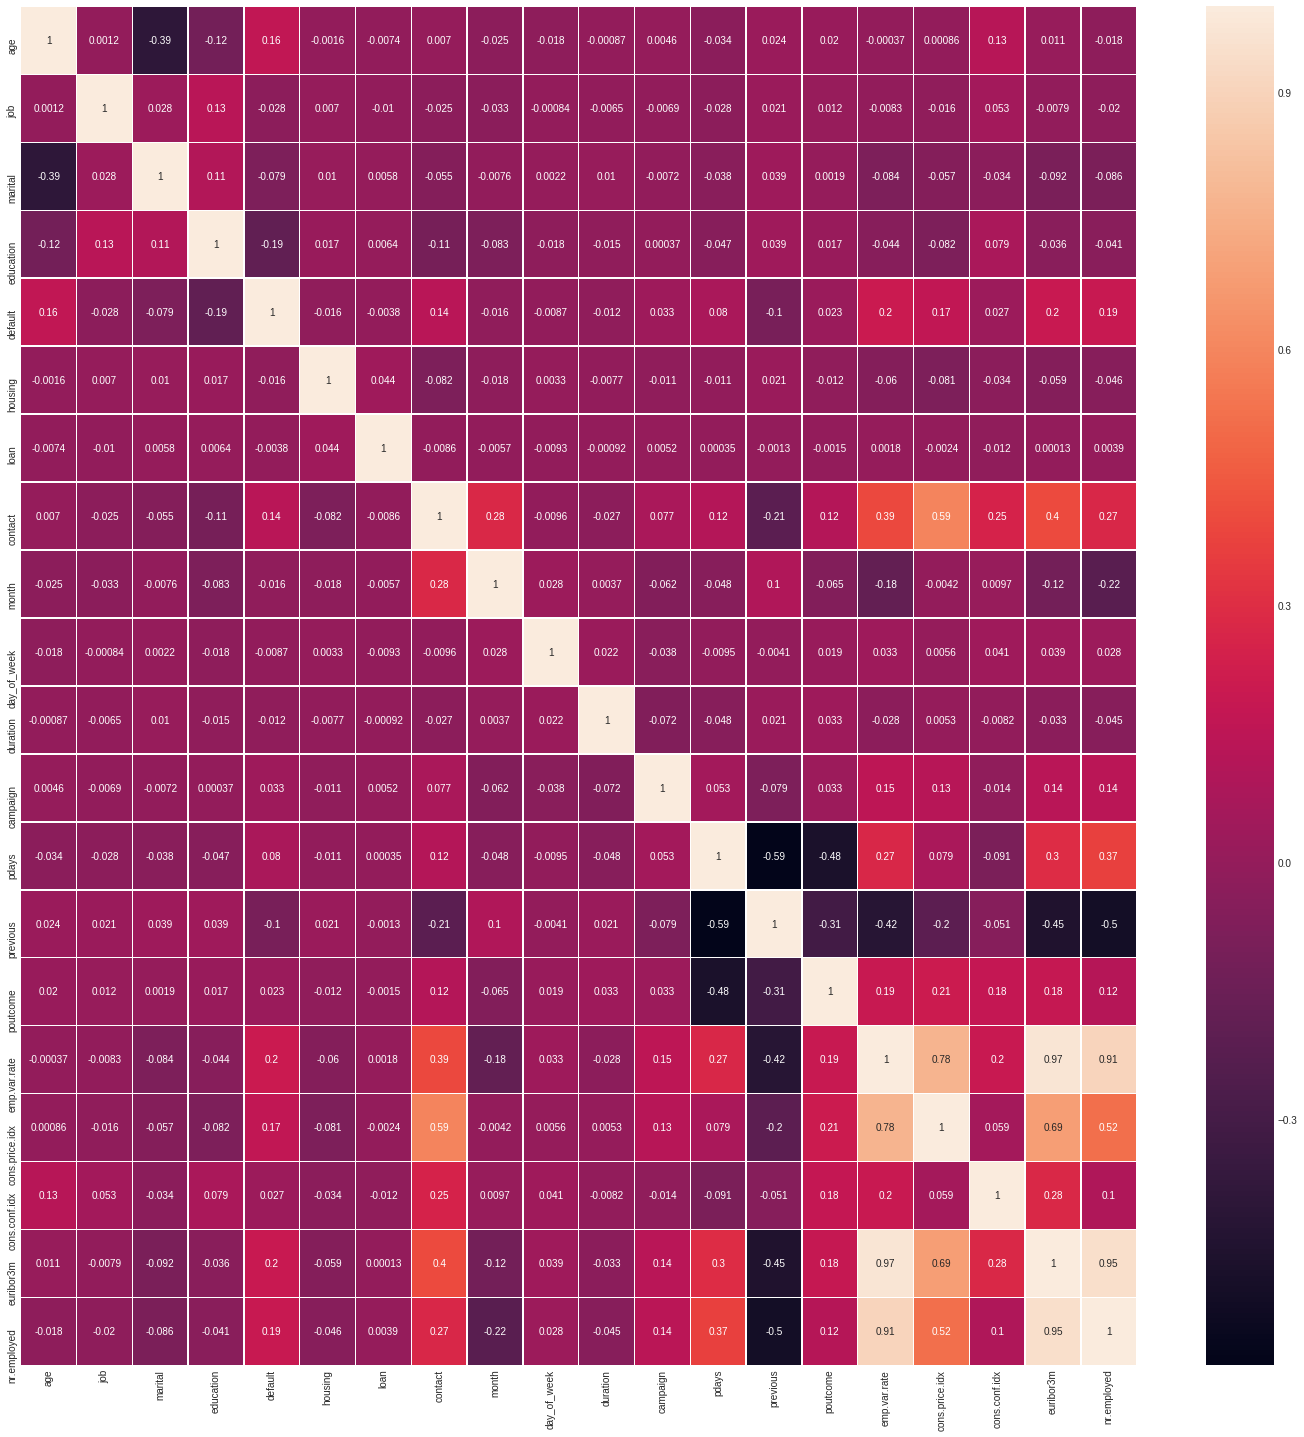

In [12]:
# We can create a correlation matrix to grasp the correlation between features of the bank_additional_full_df 
# with the exception of the target variable (y)

feats1 = bank_additional_full_df.iloc[:, :20]

f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(feats1.corr(), annot=True, linewidths=.5,ax=ax)

By the correlation matrix we see that the columns ['emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed'] are heavily correlated as seen by the color of their respective cells. Therefore, they can be dropped leaving features which have a correlation value less than or equal 0.28. 

Let's view the new correlation matrix.

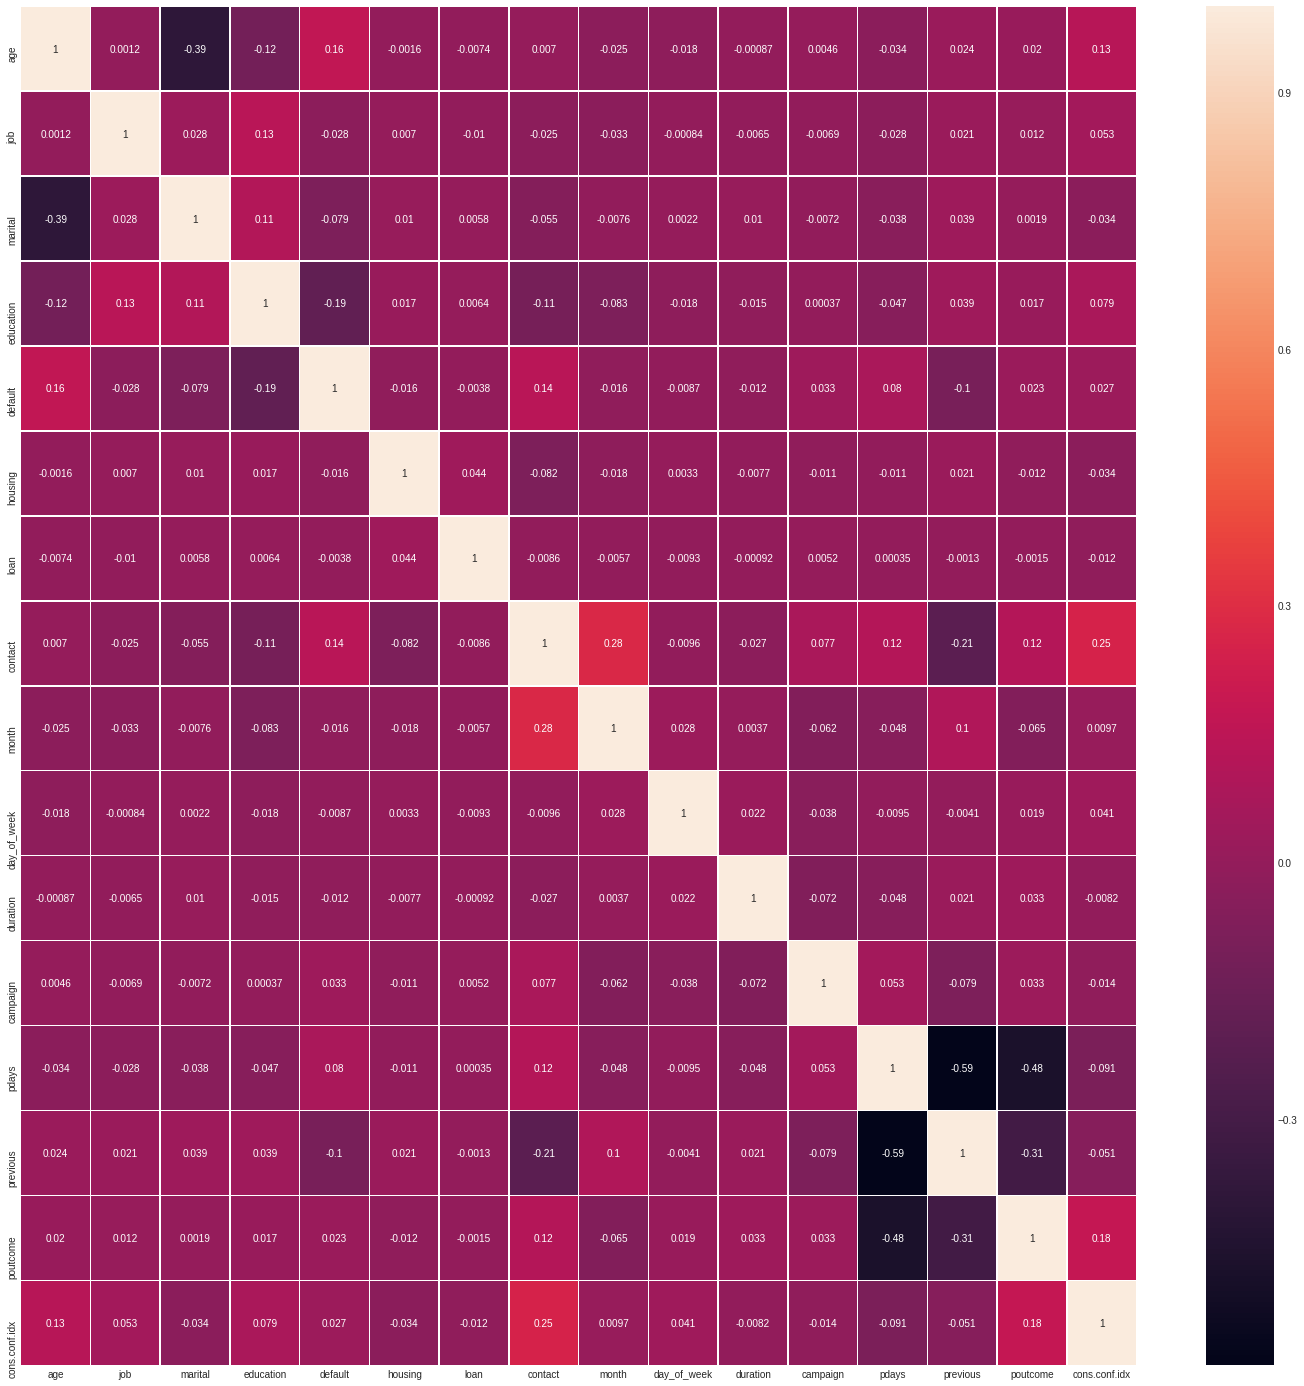

In [13]:
# We can create a new correlation matrix to grasp the correlation between the remaining features
# with the highly correlated features removed 
feats2 = bank_additional_full_df.drop(['emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed', 'y'], axis=1)

g,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(feats2.corr(), annot=True, linewidths=.5,ax=ax)

## 3. Experiments
### 3.1 Predictive Modeling 

The task of predicting the value of an attribute by based on the value of other attributes:

- The attributes that are used to make the prediction are known as the **explanatory attributes** (also known as independent variables or predictors) 
- The attribute to be predicted is known as the **taraget attribute** (also known as dependent variable, respond variable, or predictand)


In [14]:
# We separate the df into the explanatory attributes (X) and taraget attribute (Y) 
X = bank_additional_full_df.drop(['emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed', 'y'], axis=1)
Y = bank_additional_full_df.iloc[:,20:]

### 3.2 Gradient Boosting Classifier model

In many supervised learning problems one has to output the variable $y$, using a training set ${\{(x_1, y_1), ... (x_n, y_n)}\}$ of known values for $x$ corresponding to values of $y$, the goal is to find an approximation $\hat{F}(x)$ to a function $F(x)$ that minimizes the expected value of some specified lost function $L(y, F(x))$: 

$$ \hat{F} = \underset{F}{\operatorname{argmin}} \mathbf{E}_{x,y}[L(y, F(x))] $$

Gradient boosting is an emsemble machine learning technique that builds the model in a stage-wise fashion as it allows optimization of an arbitrary differentiable loss function.

In [15]:
# We further split the data into training and testing sets to train and test the model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
gb = GradientBoostingClassifier(random_state = 42) 
gb_model = gb.fit(X_train, y_train)

# Getting the score of feature matrix and its target values 
gb_model.score(X_test,y_test)

print('The accuracy score for the Gradient Boosting Classifier model was %.2f%%' %(gb_model.score(X_test,y_test)*100))

The accuracy score for the Gradient Boosting Classifier model was 91.90%


In [16]:
# Model Prediction 
gb_preds = gb_model.predict(X_test)

# Print the classification report of the rf model
print(classification_report(y_true = y_test, y_pred = gb_preds))

#Print the confusion matrix of the rf model
print('\nConfusion Matrix:\n', confusion_matrix(y_test,gb_preds))

             precision    recall  f1-score   support

          0       0.94      0.97      0.96     14655
          1       0.69      0.49      0.57      1821

avg / total       0.91      0.92      0.91     16476


Confusion Matrix:
 [[14258   397]
 [  937   884]]


### 3.3 Random Forest Classifier model

Random decision forests are another ensemble learning method for classification and regression by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [17]:
# We further split the data into training and testing sets to train and test the model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
rf = RandomForestClassifier(random_state = 42) 
rf_model = rf.fit(X_train, y_train)

# Getting the score of feature matrix and its target values 
rf_model.score(X_test,y_test)

print('The accuracy score for the Random Forest Classification model was %.2f%%' %(rf_model.score(X_test,y_test)*100))

The accuracy score for the Random Forest Classification model was 90.76%


In [18]:
# Model Prediction 
rf_preds = rf_model.predict(X_test)

# Print the classification report of the rf model
print(classification_report(y_true = y_test, y_pred = rf_preds))

#Print the confusion matrix of the rf model
print('\nConfusion Matrix:\n', confusion_matrix(y_test,rf_preds))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95     14655
          1       0.63      0.40      0.49      1821

avg / total       0.90      0.91      0.90     16476


Confusion Matrix:
 [[14233   422]
 [ 1101   720]]


### 3.4 MLP Classifier model 

A multilayer perceptron (MLP) is a class of feedforward artificial neural network. An MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron, which can distinguish data that is not linearly separable.

In [19]:
#We further split the data into training and testing sets to train and test the model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
mlp = MLPClassifier(hidden_layer_sizes = (15,15,15), max_iter = 1000)
mlp.fit(X_train,y_train)

print('The accuracy score for the MLP Classification model was %.2f%%' %(mlp.score(X_test,y_test)*100))

The accuracy score for the MLP Classification model was 90.97%


In [20]:
# Model Prediction 
mlp_preds = mlp.predict(X_test)

# Print the classification report of the rf model
print(classification_report(y_true = y_test, y_pred = mlp_preds))

# Print the confusion matrix of the rf model
print('\nConfusion Matrix:\n', confusion_matrix(y_test,mlp_preds))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95     14655
          1       0.66      0.39      0.49      1821

avg / total       0.90      0.91      0.90     16476


Confusion Matrix:
 [[14284   371]
 [ 1116   705]]


### 3.5 Logistic Regression model 

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

In [21]:
# We further split the data into training and testing sets to train and test the model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
lgr = LogisticRegression(random_state = 42) 
lgr_model = lgr.fit(X_train, y_train)

# Getting the score of feature matrix and its target values 
lgr_model.score(X_test,y_test)

print('The accuracy score for the Random Forest Classification model was %.2f%%' %(lgr_model.score(X_test,y_test)*100))

The accuracy score for the Random Forest Classification model was 90.68%


In [22]:
# Model Prediction 
lgr_preds = lgr.predict(X_test)

# Print the classification report of the rf model
print(classification_report(y_true = y_test, y_pred = lgr_preds))

# Print the confusion matrix of the rf model
print('\nConfusion Matrix:\n', confusion_matrix(y_test,lgr_preds))

             precision    recall  f1-score   support

          0       0.92      0.98      0.95     14655
          1       0.65      0.35      0.45      1821

avg / total       0.89      0.91      0.89     16476


Confusion Matrix:
 [[14306   349]
 [ 1186   635]]


## 4. Results

### 4.1 Model Comparison

In this subsection, 10 fold cross vaildation is being explored, as the dataset is large each model will have a different behavioral pattern result on each fold, which we will now examine to avoid overfitting and/ or underfitting. Overfitting is often a result of an excessively complicated model, and it can be prevented by fitting multiple models and using validation or cross-validation to compare their predictive accuracies on test data.  Intuitively, underfitting occurs when the model or the algorithm does not fit the data well enough. Underfitting is often a result of an excessively simple model, hence we will choose several models and report their mean accuracy and standard deviation.

Cross-validation is a statistical method used to estimate the skill of machine learning models. It is commonly used in applied machine learning to compare and select a model for a given predictive modeling problem because it is easy to understand, easy to implement, and results in skill estimates that generally have a lower biases or a less optimistic estimate of the model skill than other methods, such as a simple train/test split. 

In [23]:
# We now prepare our selected models
models = []
models.append(( ' GB ' , GradientBoostingClassifier()))
models.append(( ' RF ' , RandomForestClassifier()))
models.append(( ' LDA ' , LinearDiscriminantAnalysis()))
models.append(( ' KNN ' , KNeighborsClassifier()))
models.append(( ' LGR ' , LogisticRegression()))
models.append(( ' SVM ' , SVC()))
models.append(( ' DT ' , DecisionTreeClassifier()))
models.append(( ' NB ' , GaussianNB()))

# We then evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.2f%% (%f)" % (name, 100*cv_results.mean(), cv_results.std())
    print(msg)

 GB : 90.08% (0.098895)
 RF : 89.33% (0.104898)
 LDA : 90.21% (0.089433)
 KNN : 89.41% (0.095998)
 LGR : 89.42% (0.115526)
 SVM : 88.72% (0.121800)
 DT : 85.24% (0.126282)
 NB : 85.54% (0.127046)


### 4.2 Explanatory Knowledge: Model Information

Here we can provide some information on the models used.

In [24]:
 models

[(' GB ', GradientBoostingClassifier(criterion='friedman_mse', init=None,
                learning_rate=0.1, loss='deviance', max_depth=3,
                max_features=None, max_leaf_nodes=None,
                min_impurity_decrease=0.0, min_impurity_split=None,
                min_samples_leaf=1, min_samples_split=2,
                min_weight_fraction_leaf=0.0, n_estimators=100,
                presort='auto', random_state=None, subsample=1.0, verbose=0,
                warm_start=False)),
 (' RF ',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False)),
 (' LDA ',
  LinearDiscriminantAnalysis(n_components=Non

### 4.3 Model Behavior

The Accuracy table below shows the results of the Model Comparison consisting of the **Mean Accuracy** and **Standard Deviation** of each model i.e. the square root of the average of the squared deviations from the mean.

#### Table 1: Accuracy
---

| Model | Mean (%) | Std Deviation |
|----------|-------------|
| GB | 90.08% |(0.098827)
|RF | 89.33% | (0.104898)
| LDA | 90.21% |(0.089433)
| KNN | 89.41% |(0.095998)
| LGR | 89.42% |(0.115526)
| SVM | 88.72%| (0.121800)
| DT | 85.12% |(0.127163)
| NB | 85.54% |(0.127046)

---

We can view the results of each fold of each model as named in the Accuracy table above respectively, in which we will create a Model CV results table.

In [25]:
results

[array([0.96868172, 0.96358339, 0.96115562, 0.94270454, 0.94828842,
        0.94828842, 0.89463462, 0.89342073, 0.86619718, 0.62141816]),
 array([0.96746783, 0.96528284, 0.95581452, 0.93226511, 0.94076232,
        0.94149065, 0.88225297, 0.88832241, 0.86304031, 0.59616319]),
 array([0.96746783, 0.96649672, 0.96285506, 0.94294732, 0.95120175,
        0.94561787, 0.89075018, 0.88492353, 0.84847013, 0.66002914]),
 array([0.95945618, 0.95630007, 0.95217286, 0.93542122, 0.93906288,
        0.94270454, 0.88905074, 0.88662297, 0.85624089, 0.62384653]),
 array([0.96941005, 0.9667395 , 0.95994173, 0.94027677, 0.94974508,
        0.94707453, 0.89633406, 0.89317796, 0.85454104, 0.56459446]),
 array([0.9720806 , 0.96479728, 0.95775674, 0.93372178, 0.93639233,
        0.94488954, 0.8980335 , 0.8798252 , 0.8436134 , 0.54055367]),
 array([0.94950231, 0.95023064, 0.93663511, 0.91915513, 0.93299345,
        0.92935178, 0.68366108, 0.82859917, 0.83681399, 0.55706654]),
 array([0.97038116, 0.96698228, 0.

#### Table 2: Accuracy after Cross-Validation (%)

---
| Model | Fold 1 |Fold 2 |Fold 3 |Fold 4 |Fold 5 |Fold 6 |Fold 7 |Fold 8 |Fold 9 |Fold 10 |
|------|------|------|------|------|------|------|------|------|
| GB | **96.87**| 96.36| 96.12| 94.27| 94.83|94.83| 89.46| 89.34| 86.62| **62.21**
| RF | **96.75**| 96.53| 95.58|93.23| 94.08| 94.15| 88.23| 88.83| 86.30|**59.62**
| LDA | **96.75**| 96.65| 96.29| 94.30| 95.12|94.56|89.08|88.49|84.85|**66.00**
| KNN | **95.95**|95.63|95.22|93.54|93.91|94.27|88.91|88.66|85.62|**62.38**
| LGR | **96.94**|96.67 |96.00| 94.03|94.97|94.71|89.63|89.32|85.45|**56.46**
|SVM |**97.21** |96.48|95.78|93.37|93.64|94.49|89.80|87.98|84.36|**54.06**
| DT |95.00|**95.17**|93.59|91.43|93.37|92.96|66.23|83.03|83.95|**55.76**
| NB |**97.04**| 96.70|96.07|94.03|94.83|94.68|77.52|69.85 |71.37|**63.33**

---

The accuracy percentages in bold represent the best and worst accuracies of the 10-fold cross validation of each model respectively. 

### 4.4 Visualization: Model comparison

We now can view the performance of the model comparison with the lines on the exterior of the boxplot represent the highest and lowest accuracies respectively. 

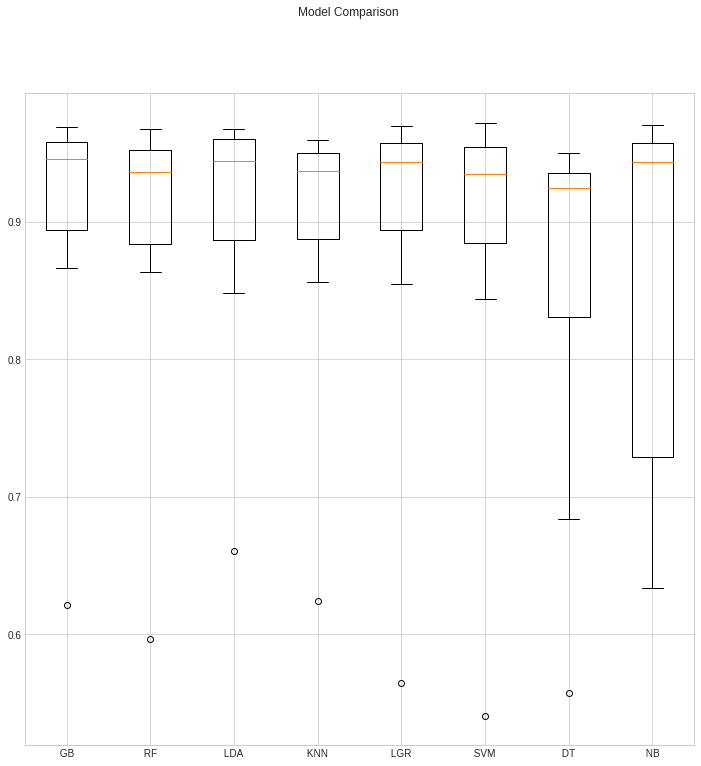

In [26]:
# Boxplot of the mean results of each supervised model for comparison 

fig = plt.figure(figsize=(12,12))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## 5. Conclusion

       
        In previous works a dataset of a massive 150 features related with bank client, product and social-economic attributes were collected, however the data used in this project consisted of 41188 examples with 20 explanatory variables (predictor variables) with very little correlation, a target variable It can be said that alot of the original explanatory variables were previously removed for several reasons which may be high correlation, noise, and/ or useless in the prediction of the target variable.
    
        In this work, four highly correlated features were removed, further reducing the number of predictor variables as inputs to each model. This can be seen in the second correlation matrix as the highest correlated value is 0.28 i.e a tad larger that 25% pairwise correlation. When the models were trained on an 60/40 split the purpose of the individual model were to test the performance of each model on 40% of the data being trained on 60% of the data, namely 16476 examples where 14655 are 0's and 1821 are 1's. The classification report shows a representation of the main classification metrics on a per-class basis. This gives a deeper intuition of the classifier behavior over global accuracy which can mask functional weaknesses in one class of a multiclass problem. The metrics are defined in terms of true and false positives, and true and false negatives. Positive and negative in this case are generic names for the classes of a binary classification problem. The Neural Netwrok, i.e. Multi-Layer Perceptron consisted of 15 layers, thus the number of weights became increasing large as it was evident in the time complexity of the algorithm despite producing an accuracy score of 90.97%. Although, the Logistic Regression model produced the lowest accuracy score on the data, it generated the largest number of true positives, compared to the other models.
    
        Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. In that, the 10-fold cross validation was applied where several machine learning algorithms were included. The models' behavior varied on each fold, as expected since each fold pertained to a new test set as seen in Table 2. The SVM model was computationally heavy as the input was over 41K examples and resulted in 88.72% accuracy mean. SVM did not perform well on the last fold, hence the decreasing of its accuracy, since employing the kernel trick does not scale well to a substantial amount of training samples, as it takes the form of a function that maps a single vector to a vector of higher dimensionality, thus approximating the kernel. 


## 6. References

- [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014
- http://archive.ics.uci.edu/ml/datasets/Bank+Marketing
- https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
- https://en.wikipedia.org/wiki/Gradient_boosting
- https://en.wikipedia.org/wiki/Random_forest
- https://en.wikipedia.org/wiki/Multilayer_perceptron
- https://www.statisticssolutions.com/what-is-logistic-regression/
- https://en.wikipedia.org/wiki/Decision_tree_learning
- https://scikit-learn.org/stable/modules/neighbors.html
- https://scikit-learn.org/stable/modules/lda_qda.html
- https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
- https://scikit-learn.org/stable/modules/svm.html#svc
- https://scikit-learn.org/stable/modules/naive_bayes.html
- https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html